In [93]:
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib as mpl

In [2]:
optuna_log_folder = '../test_dir/optuna_FBRN_out/logs/'
optuna_log_file = 'optuna_01-feb-23.log'

In [28]:
# Regex
regex = re.compile(r"Trial ([0-9]+) [a-z, ]*: ([0-9,.]*) [a-z, , :, {]*\'learning_rate\': ([0-9.]*), \'nb_blocks\': ([0-9]*), \'nb_epochs\': ([0-9]*)")


In [53]:
loss_list = []
lr_list = []
nb_blocks_list = []
nb_epochs_list = []

for line in open(optuna_log_folder+optuna_log_file, 'r').readlines():
    data = regex.search(line)
    if data is not None:
        loss_list.append(float(data.group(2)))
        lr_list.append(float(data.group(3)))
        nb_blocks_list.append(int(data.group(4)))
        nb_epochs_list.append(int(data.group(5)))

In [54]:
loss_np = np.array(loss_list)
lr_np = np.array(lr_list)
nb_blocks_np = np.array(nb_blocks_list)
nb_epochs_np = np.array(nb_epochs_list)

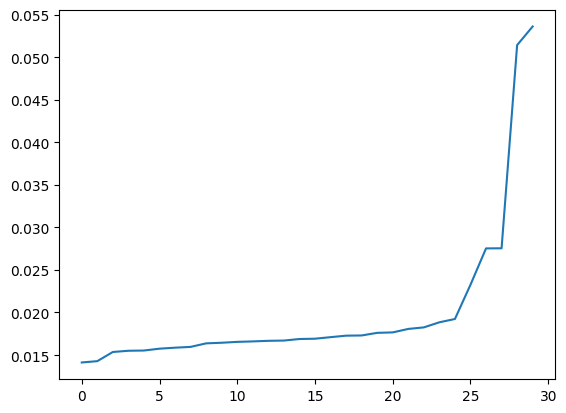

In [65]:
plt.plot(np.sort(loss_np))

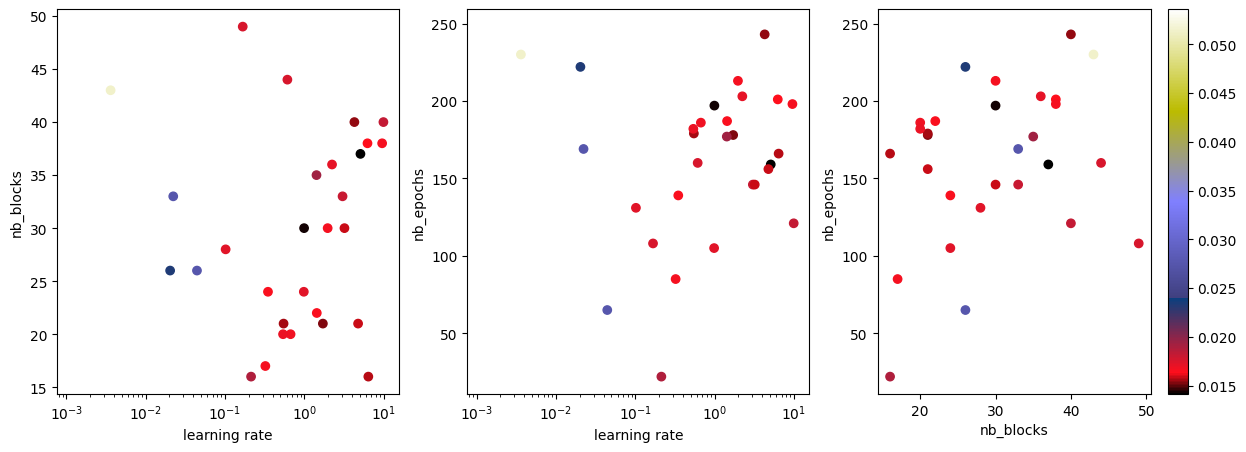

In [74]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
vmax = max(loss_np)
vmin = min(loss_np)

im = ax[0].scatter(lr_np, nb_blocks_np, c=loss_np, cmap='gist_stern',vmax=vmax, vmin=vmin)
ax[0].set_xscale('log')
ax[0].set_xlabel('learning rate')
ax[0].set_ylabel('nb_blocks')

im = ax[1].scatter(lr_np, nb_epochs_np, c=loss_np, cmap='gist_stern',vmax=vmax, vmin=vmin)
ax[1].set_xscale('log')
ax[1].set_xlabel('learning rate')
ax[1].set_ylabel('nb_epochs')

im = ax[2].scatter(nb_blocks_np, nb_epochs_np, c=loss_np, cmap='gist_stern',vmax=vmax, vmin=vmin)
ax[2].set_xlabel('nb_blocks')
ax[2].set_ylabel('nb_epochs')

plt.colorbar(im, ax=ax[2])
plt.show()

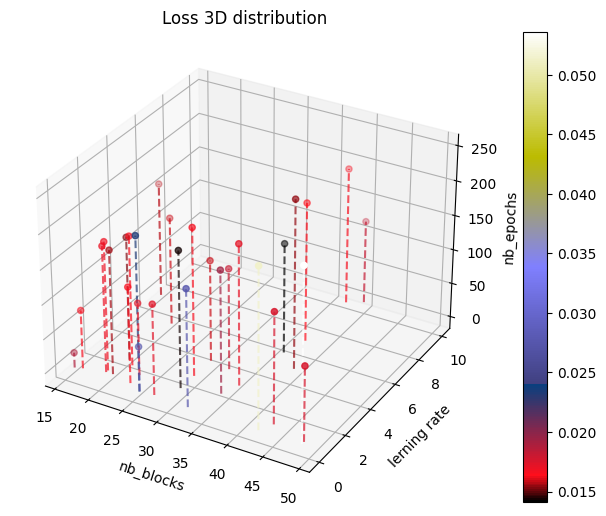

In [109]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(projection='3d')
im = ax.scatter(nb_blocks_np, lr_np, nb_epochs_np, c=loss_np, cmap='gist_stern')
ax.set_xlabel('nb_blocks')
ax.set_ylabel('lerning rate')
ax.set_zlabel('nb_epochs')
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.title('Loss 3D distribution')

for point in zip(nb_blocks_np, lr_np, nb_epochs_np,loss_np):
    #normalize item number values to colormap
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    #colormap possible values = viridis, jet, spectral
    rgba_color = mpl.cm.gist_stern(norm(point[3]),bytes=False)
    ax.plot(np.tile(point[0],2),np.tile(point[1],2),[0,point[2]], '--', c=rgba_color, alpha=0.7)

plt.show()